In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
data = pd.read_csv("Dataset/final_df.csv")
total_percent = pd.read_csv("Dataset/total_percent.csv")
data.head()

,Unnamed: 0,Date,Store,Holiday Name,Is Holiday,Weekly_Sales,Temperature,CPI,Unemployment,Fuel_Price,Temp Category,Unemployment Category
0,0,2010-02-05,1,No Holiday,No Holiday,1643690.90,6,211.10,8.106,2.57,0°C to 9°C,Normal: 6%-9%
1,1,2010-02-05,2,No Holiday,No Holiday,2136989.46,5,210.75,8.324,2.57,0°C to 9°C,Normal: 6%-9%
2,2,2010-02-05,3,No Holiday,No Holiday,461622.22,8,214.42,7.368,2.57,0°C to 9°C,Normal: 6%-9%
3,3,2010-02-05,4,No Holiday,No Holiday,2135143.87,7,126.44,8.623,2.60,0°C to 9°C,Normal: 6%-9%
4,4,2010-02-05,5,No Holiday,No Holiday,317173.10,4,211.65,6.566,2.57,0°C to 9°C,Normal: 6%-9%


In [122]:
import datetime as datetime
#dates = data["Date"].replace("-", "/")
data["Date"] = data["Date"].str.replace("-","/")
data["Date"]

0       2010/02/05
1       2010/02/05
2       2010/02/05
3       2010/02/05
4       2010/02/05
           ...    
7600    2013/04/26
7601    2013/04/26
7602    2013/04/26
7603    2013/04/26
7604    2013/04/26
Name: Date, Length: 7605, dtype: object

In [123]:
import datetime as dt
x_values = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in data["Date"]]

ValueError: time data '2010/02/05' does not match format '%m/%d/%Y'

In [28]:
regular_sales_total = data.loc[data["Is Holiday"]=="No Holiday"]["Weekly_Sales"].sum()
holiday_sales_total = data.loc[data["Is Holiday"]=="Holiday"]["Weekly_Sales"].sum()
holiday

534564028.89

In [29]:
weekly_sales = data["Weekly_Sales"]
ave_temperature = data["Temperature"]
ave_fuel_price = data["Fuel_Price"]
un_rate = data["Unemployment"]
cpi = data["CPI"]
store_number = data["Store"]

#holiday_sales = data["motor vehicle theft"]
#regular_sales = data["larceny-theft"]
#ave_regular_sales = data["property crime"].mean()
#weeks = data["year"]
#regular_days = data["burglary"]
#holidays = data["year"]

In [33]:
weekly_sales

0       1643690.90
1       2136989.46
2        461622.22
3       2135143.87
4        317173.10
           ...    
7600          0.00
7601          0.00
7602          0.00
7603          0.00
7604          0.00
Name: Weekly_Sales, Length: 7605, dtype: float64

In [25]:
regular_sales_total
markdown_sales_total

types = ["Regular Sales","Markdown Sales"]
sales = data["violent crime rate"]
explode = (0,1)
plt.title("Markdown Sales vs. Regiular Sales")
plt.pie(sales, labels = types, autopct="%1.1f%%", shadow = True)
plt.axis("equal")

NameError: name 'markdown_sales_total' is not defined

(-1.1076047862999432,
 1.1003621571621467,
 -1.1018516780641336,
 1.107699260694615)

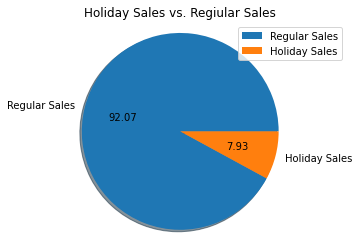

In [61]:
#PIE CHART TOTAL HOLIDAY AND NON HOLIDAY SALES
regular_sales_total
holiday_sales_total

types = ["Regular Sales","Holiday Sales"]
sales = [regular_sales_total, holiday_sales_total]
explode = (0,1)
plt.title("Holiday Sales vs. Regiular Sales")
plt.pie(sales, labels = types, shadow = True,autopct='%.2f')
plt.legend()
plt.axis("equal")

<Figure size 14400x7200 with 0 Axes>

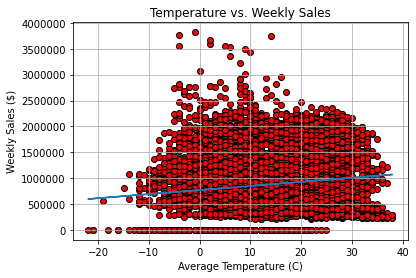

<Figure size 14400x7200 with 0 Axes>

In [55]:
#SCATTER PLOT BY AVERAGE TEMPERATURE
ave_temperature
weekly_sales

plt.title("Temperature vs. Weekly Sales")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(-50,50)
#plt.ylim(0,100000)
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)
plt.figure(figsize=(200,100)) 

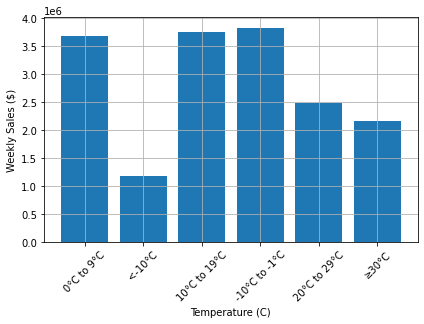

In [100]:
#BAR GRAPH by TEMP CATEGORY
plt.bar(data["Temp Category"],data["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

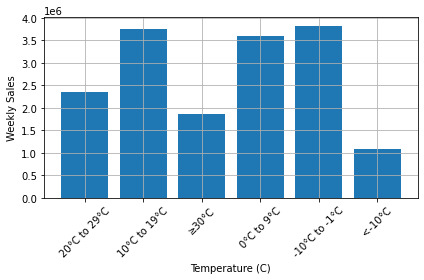

In [99]:
#HOLIDAY WEEKLY SALES BY TEMPERATURE CATEGORY
bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Temp Category"],bars["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

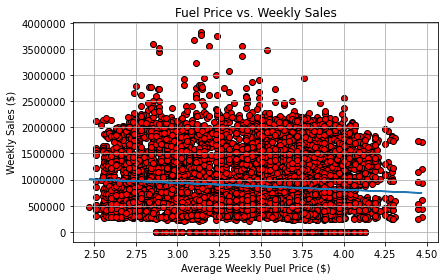

In [98]:
#SCATTER by FUEL PRICE
ave_fuel_price
weekly_sales

plt.title("Fuel Price vs. Weekly Sales")
plt.xlabel("Average Weekly Puel Price ($)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)

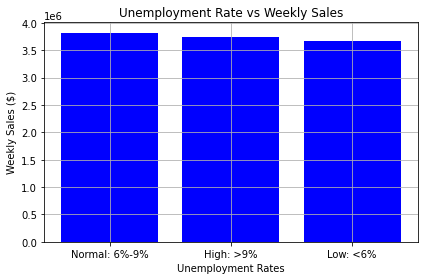

In [97]:
#WEKLY SALES BY UNEMPLOYMENT CATEGORIES
unemp_categories = data["Unemployment Category"]
weekly_sales = data["Weekly_Sales"]

plt.title("Unemployment Rate vs Weekly Sales")
plt.bar(unemp_categories, weekly_sales, color="blue")
plt.xlabel("Unemployment Rates")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

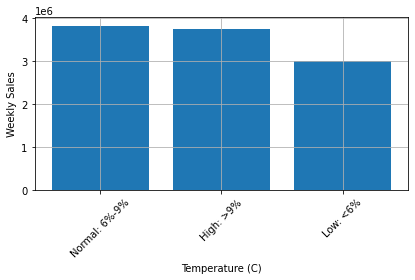

In [96]:
#WEKLY SALES BY UNEMPLOYMENT CATEGORIES
bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Unemployment Category"],bars["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

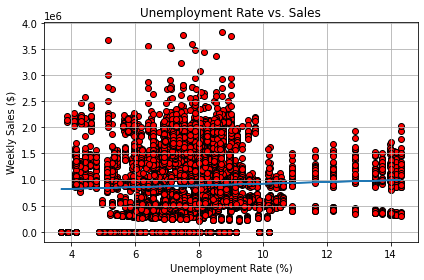

In [101]:
#SCATTER UNEMPLOYMENT RATE V SALES
plt.title("Unemployment Rate vs. Sales")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(4,15)
#plt.ylim(0,5000000)
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.grid()
plt.tight_layout()

ValueError: x and y must be the same size

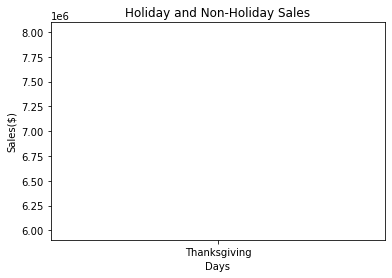

In [88]:
#HOLIDAY SALES VS REGULAR SALES
holidays = ["Thanksgiving","Christmas","Independence Day","New Years"]
#regular_days
holiday_sales
regular_sales
plt.title("Holiday and Non-Holiday Sales")
plt.xlabel("Days")
plt.ylabel("Sales($)")
plt.scatter(regular_days, regular_sales, marker="o", color="red")
plt.scatter(holidays, holiday_sales, marker="x", color = "blue")
#plt.ylim(0,100000)
plt.scatter(regular_days, regular_sales, marker="o", color="red")
#plt.scatter(holidays, holiday_sales, marker="x")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.legend(loc="best")
plt.grid()

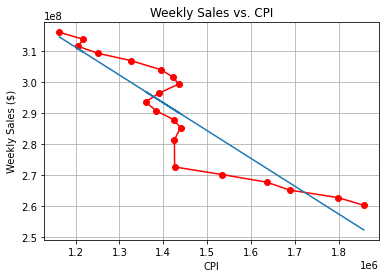

In [75]:
#WEEKLY SALES BY CPI
weekly_sales
cpi
plt.title("Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("CPI")
#plt.xlim(150,250)
#plt.ylim(0,100000)
plt.plot(cpi,weekly_sales,marker="o", color="red")
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.legend(loc="best")
plt.grid()


In [16]:
#WEEKLY SALES BY HOLIDAY
weekly_sales = sales_rank["Weekly Sales"]
holidays = sales_rank["Holiday Name"]
plt.bar(holidays, weekly_sales)
plt.xlabel("Day")
plt.ylabel("Weekly Sales")
plt.ylim(0,100000)
plt.legend(loc="best")

NameError: name 'sales_rank' is not defined

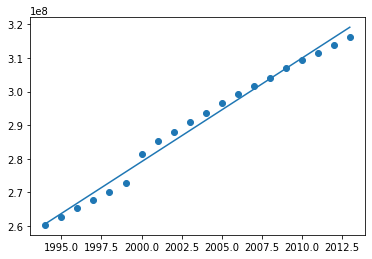

In [110]:
#holiday sales by store number
plt.scatter(store_number, weekly_sales)
slope, intercept, r_value, p_value, std_err = st.linregress(store_number, weekly_sales)
best_fit = slope*store_number+intercept
plt.plot(store_number,best_fit)
plt.legend(loc="best")
plt.show()

In [102]:
#SCATTER OF ALL HOLIDAYS
christmas = data.loc[data["Holiday Name"]=="Christmas"]
thanksgiving = data.loc[data["Holiday Name"]=="Thanksgiving"]
independence_day = data.loc[walmart_holiday["Holiday Name"]=="Independence Day"]
new_years = data.loc[walmart_holiday["Holiday_Name"]=="New Year"]
no_holiday = data.loc[walmart_holiday["Holiday_Name"]=="No Holiday"
date = data["Date"]
weekly_xmas_sales = christmas["Weekly_Sales"]
weekly_thanks_sales = thanksgiving["Weekly_Sales"]
weekly_ind_sales = independence_day["Weekly_Sales"]
weekly_ny_sales = new_years["Weekly_Sales"]
weekly_regular_sales = no_holiday["Weekly Sales"]
plt.scatter(date,weekly_xmas_sales,marker="o",color="red")
plt.scatter(date,weekly_thanks_sales,marker="o",color="blue")
plt.scatter(date,weekly_ind_sales,marker="o",color="green")
plt.scatter(date,weekly_ny_sales,marke="o",color="yellow")
plt.scatter(date,weekly_regular_sales,marker="o",color="orange")       
plt.legend(loc="best")
plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-102-d51f9af84e5d>, line 7)